# Follow Along To a Tutorial

link: https://ourcodingclub.github.io/tutorials/topic-modelling-python/

In [1]:
# importing the necessary datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re

In [2]:
# importing the dataset and exploring it
df = pd.read_csv("CC-topic-modelling-python/climate_tweets.csv")

## Reminder:
_Scraping_ tweets is an entirely differet __but very important__ process that must be studied! For now, we consciously skip this step in favor of getting to Topic Modelling ASAP

In [3]:
df.head()

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...


# Exploring the dataset

In [4]:
# total number of tweets?
df.shape

(6090, 1)

In [5]:
# [DOMAIN KNOWLEDGE] But some people retweet!
df.tweet.unique().shape

(5541,)

In [6]:
# So how many retweets are there? REMEMBER THAT THEY BEGIN WITH RT

# Since retweets -START- with an RT, then we know that they are the first 2 characters
df['tweet'].apply(lambda x: x[:2] == 'RT')

0       False
1       False
2       False
3       False
4       False
        ...  
6085    False
6086    False
6087    False
6088    False
6089    False
Name: tweet, Length: 6090, dtype: bool

In [7]:
# How many RTs?
df['tweet'].apply(lambda x: x[:2] == 'RT').sum()

773

In [8]:
# Creating a new column that indicates if a specific tweet is a retweet
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2] == 'RT')

In [9]:
# Looking for the most re occuring tweet
df.groupby(['tweet']).size().reset_index(name='counts')\
    .sort_values('counts', ascending=False).head(10) # top 10 tweeets from this dataset

,tweet,counts
3131,No matter if you believe in global warming or ...,20
4555,Take Action @change: Help Protect Wildlife Hab...,14
4027,RT @newtgingrich: Historic snow storm in washi...,9
1765,Fight Climate Change From All Fronts: [link],8
1626,Earth's polar ice sheets vulnerable to even mo...,7
1941,Global Warming Dent's El Ni'o's Protective Shi...,7
1799,Foes of California's global warming law pour m...,6
1351,Coalition of the Tired of Waiting: Fighting Cl...,6
4271,SCIENCE: Scientists explore the evolution of c...,6
1040,Carbon offsets: How a Vatican forest failed to...,6


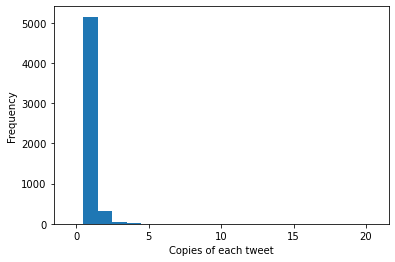

In [10]:
# Number of times each tweet appears
counts = df.groupby(['tweet']).size().reset_index(name='counts').counts

# specifying the umber of bins for the histogram
my_bins = np.arange(0, counts.max() + 2, 1) -0.5

# Plotting specifics
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1, counts.max()+1, 1)
plt.xlabel('Copies of each tweet')
plt.ylabel('Frequency')
plt.show()

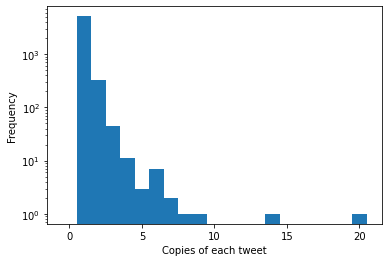

In [11]:
# The above plot is -heavily- skewed. We take the LOG-TRANSFORM of the y-axis.
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1, counts.max()+1, 1)
plt.xlabel('Copies of each tweet')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# Extracting substrings with regular expressions
Let's find out who are

    - Tweeting the most 
    - Being tweeted AT The most
    - most common hashtags


In [12]:
# Twitter handles of all those who are retweeted


In [13]:
# Exploring what the regex function does, FIRST we get a KNOWN retweet
retweet_one = df.loc[df.is_retweet == True].head(1)

In [14]:
retweet_one.tweet

5    RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...
Name: tweet, dtype: object

In [15]:
type(retweet_one.tweet)

pandas.core.series.Series

In [16]:
retweet_one.tweet.values[0]

'RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness Shows Global Warming Is Intensifying Our Water Cycle [link]'

In [17]:
re.findall('(?<=RT\s)', retweet_one.tweet.values[0])

['', '']

In [18]:
re.findall('(?<=RT\s)(@[A-Za-z])', retweet_one.tweet.values[0])

['@s', '@J']

In [19]:
re.findall('(?<=RT\s)(@[A-Za-z]+)', retweet_one.tweet.values[0])

['@sejorg', '@JaymiHeimbuch']

__Note to self:__ We're using a _positive lookbehind_ to look for the ___RT___ keyword and we're taking the twitter handle that comes after it. _BUT_ The twitter handle is being captured by using the `+` quantifier. Using this within the context of a Group `(...)` allows us to capture the entire handle. Especially when capital letters, small letters, and numbers are being "Ranged" (via `[...]`) like so `(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)`

In [20]:
# Now we define the function that captures the handle of the person being retweeted
def find_retweeted(tweet):
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

__Note to self__: Similarly, we'll be taking the handles of all those who are being __mentioned__ by making sure that the tweet they're being mentioned in ___does not start with the string 'RT'___ WE USE A NEGATIVE LOOK-BEHIND

In [21]:
# Function to find all the handles of people who were mentioned
def find_mentioned(tweet):
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

Since we're working with tweets, we just ___gotta___ find them hashtags

In [22]:
def find_hashtags(tweet):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [23]:
'(#[A-Za-z]+[A-Za-z0-9-_]+)'

'(#[A-Za-z]+[A-Za-z0-9-_]+)'

In [24]:
# Testing the functions we defined
tweet_1 = "RT @jakelong_americandragon: Dragon up! Can @you do this?"
tweet_2 = "Wow that was #nostalgic"

In [25]:
find_retweeted(tweet_1)

['@jakelong_americandragon']

In [26]:
find_mentioned(tweet_1)

['@you']

In [27]:
find_hashtags(tweet_2)

['#nostalgic']

Create columns in the dataframe to capture (i) the person being retweeted (ii) the person bein mentioned, (iii) the hashtag.

In [28]:
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [30]:
df

,tweet,is_retweet,retweeted,mentioned,hashtags
0,Global warming report urges governments to act...,False,[],[],[]
1,Fighting poverty and global warming in Africa ...,False,[],[],[]
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[]
...,...,...,...,...,...
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]"
6086,Virginia to Investigate Global Warming Scienti...,False,[],[],[]
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]"
6088,One-Eyed Golfer: Don't dare tell me about glob...,False,[],[],[]


# Studying the hashtags
What are the popular hashtags?

In [33]:
hashtags_list_df = df.loc[ # immediately subsetting on the data frame
                        df.hashtags.apply( # getting a list of booleans by ...
                            lambda hashtag_list: hashtag_list !=[]) # ... checking for non-empty hashag columns
                        ]

In [35]:
hashtags_list_df

,tweet,is_retweet,retweeted,mentioned,hashtags
12,Ecotone: #Climate change from a #population pe...,False,[],[],"[#Climate, #population]"
16,For #EarthDay Global warming could affect pati...,False,[],[],[#EarthDay]
26,It's global climate change-not warming. #ac Re...,False,[],[],[#ac]
31,@New_federalists i have it on good auth tht g...,False,[],[@New_federalists],[#tcot]
36,RT @virgiltexas: Hey Al Gore: see these tornad...,True,[@virgiltexas],[],"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,..."
...,...,...,...,...,...
6076,RT @johnnyA99 'Ecocide 2 be used to prosecute ...,True,[@johnnyA99],[],"[#liberalFascism, #News, #tcot]"
6083,RT @EPSclimate: Climate change row over the my...,True,[@EPSclimate],[],[#climate]
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]"
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]"


Okaaay, but we have a __column of lists__ let's flatten this out so that we have a column of hashtags

In [40]:
[hashtag for hashtags_list in hashtags_list_df.hashtags for hashtag in hashtags_list]

['#Climate',
 '#population',
 '#EarthDay',
 '#ac',
 '#tcot',
 '#tornadocot',
 '#ocra',
 '#sgp',
 '#gop',
 '#ucot',
 '#tlot',
 '#p2',
 '#tycot',
 '#justinbiebersucks',
 '#tcot',
 '#p2',
 '#IPCC',
 '#teaparty',
 '#global',
 '#climate',
 '#eco',
 '#EarthWeek',
 '#Indigenous',
 '#PEN',
 '#EPA',
 '#climate',
 '#Canadian',
 '#CEOs',
 '#green',
 '#biochar',
 '#climate',
 '#climate',
 '#Digg',
 '#IRI',
 '#Climate',
 '#Ethiopia',
 '#Climate',
 '#Ethiopia',
 '#EARTHDAY',
 '#green',
 '#Cochabamba',
 '#EcoMonday',
 '#EarthDay',
 '#green',
 '#eco',
 '#Meat-Wise',
 '#Episcopal',
 '#Maine',
 '#Bangor',
 '#tedxvolcano',
 '#TEDxVolcano',
 '#socmedia',
 '#socent',
 '#green',
 '#tedxvolcano',
 '#Climate',
 '#population',
 '#green',
 '#degrowth',
 '#degrowth',
 '#climate',
 '#IRA',
 '#climate',
 '#NPR',
 '#p2',
 '#ilsen',
 '#Climate',
 '#EarthDay',
 '#earthday',
 '#Discovery',
 '#Allergy',
 '#Climate',
 '#globalwarming',
 '#FortuneGreen',
 '#oilspill',
 '#California',
 '#climate',
 '#CUBeyond',
 '#Chapman

YOU CAN EMBED A LIST COMPREHENSION WITHIN A LIST COMPREHENSION?!?!?? WHERE HAS THIS BEEN ALL MY LIFE?!?

In [42]:
flattened_hashtags_df = pd.DataFrame(
        [hashtag for hashtags_list in hashtags_list_df.hashtags
         for hashtag in hashtags_list],
        columns = ['hashtag']
                                    )

In [43]:
flattened_hashtags_df

,hashtag
0,#Climate
1,#population
2,#EarthDay
3,#ac
4,#tcot
...,...
2062,#IPCC
2063,#ocra
2064,#tcot
2065,#p2


In [44]:
# Nuber of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

477

In [56]:
flattened_hashtags_df.groupby('hashtag').size().reset_index(name='counts').sort_values('counts', ascending = False).reset_index(drop=True)

,hashtag,counts
0,#tcot,227
1,#climate,202
2,#p2,112
3,#green,50
4,#climatechange,47
...,...,...
472,#home,1
473,#hoth,1
474,#houston,1
475,#humanrights,1


In [57]:
# Distrbution of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size().reset_index(name='counts')\
.sort_values('counts', ascending = False)\
.reset_index(drop=True)

In [58]:
counts_hashtag = flattened_hashtags_df.groupby('hashtag').size().reset_index(name='counts').counts
# This is just a Series object of all of the counts. BUT IN THE SAME ORDER when summarized previously
# This is just for plotting purposes

In [59]:
counts_hashtag

0      2
1      2
2      2
3      1
4      8
      ..
472    2
473    1
474    4
475    1
476    3
Name: counts, Length: 477, dtype: int64

In [64]:
flattened_hashtags_df.groupby('hashtag').size().reset_index(name='counts').reset_index(drop=True)

,hashtag,counts
0,#AB32,2
1,#AGW,2
2,#ALMS,2
3,#ANTISCIENCE,1
4,#Africa,8
...,...,...
472,#wildlife,2
473,#wnd,1
474,#wpccc,4
475,#wsj,1


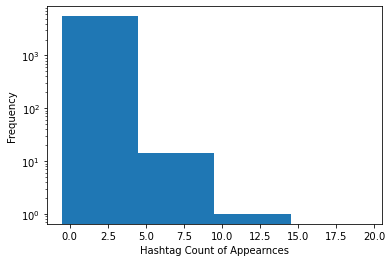

In [66]:
my_bins = np.arange(0, counts.max() + 2, 5) - 0.5

# plotting
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1, counts.max() + 1, 1)
plt.xlabel('Hashtag Count of Appearnces')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# Distribution of retweeted people

In [67]:
# first take out all of the non-empty retweeted handles
retweet_list_df = df.loc[
    df.retweeted.apply(
        lambda retweeted_list: retweeted_list != []
    )
                        ]

In [70]:
retweet_list_df

,tweet,is_retweet,retweeted,mentioned,hashtags
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,True,"[@sejorg, @JaymiHeimbuch]",[],[]
23,RT @WGofNYC Leader of National Indigenous Wome...,True,[@WGofNYC],[],[]
36,RT @virgiltexas: Hey Al Gore: see these tornad...,True,[@virgiltexas],[],"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,..."
41,Proof there's no climate change. RT @jazgar 75...,False,[@jazgar],[],[]
70,RT @redostoneage: NASAs changing Facts; Guess ...,True,[@redostoneage],[],"[#global, #climate, #eco]"
...,...,...,...,...,...
6058,RT @earthvitalsigns: Ice ice baby! Get the low...,True,[@earthvitalsigns],[],[]
6068,RT @JerryMander: Daily Kos: ecojustice: system...,True,[@JerryMander],[],[]
6072,RT @brookedunne: Intl Conference of Scientists...,True,[@brookedunne],[],[]
6076,RT @johnnyA99 'Ecocide 2 be used to prosecute ...,True,[@johnnyA99],[],"[#liberalFascism, #News, #tcot]"


In [73]:
# Flattening out the retweeted mentions
flattened_retweet_df = pd.DataFrame(
    [handle for retweeted_list in retweet_list_df.retweeted for handle in retweeted_list],
    columns = ['handles']
)

In [74]:
flattened_retweet_df.head()

,handles
0,@sejorg
1,@JaymiHeimbuch
2,@WGofNYC
3,@virgiltexas
4,@jazgar


In [83]:
# Table of top of counts
flattened_retweet_df.groupby('handles').size().reset_index(name = 'counts').sort_values('counts', ascending=False).reset_index(drop=True)

,handles,counts
0,@Drudge_Report,19
1,@Newsweek,18
2,@redostoneage,12
3,@newtgingrich,10
4,@mattyglesias,10
...,...,...
537,@RoseD1st1,1
538,@RosanneMF,1
539,@RightNowLady,1
540,@RickWarren,1


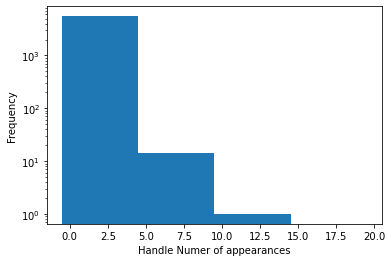

In [86]:
# Distribution
counts_retweet = flattened_retweet_df.groupby('handles').size().reset_index(name = 'counts').counts

# bins
my_bins = np.arange(0, counts.max() + 2, 5) - 0.5

# Plot
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1, counts.max() + 1, 1)
plt.xlabel('Handle Numer of appearances')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# Text to Vector

Suppose we had the available hashtags as `[#photo, #pets, #funny, #sun]` and the tweet `#funny #pets`, then we would have the vector `[0, 1, 1 0]`

In [87]:
# Making sure we have a minimum appearance tolerance level
min_appearance = 10

# creating the set of all hashtags in our dataset
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts >= min_appearance
                            ]['hashtag'])

In [91]:
hashtags_list_df

,tweet,is_retweet,retweeted,mentioned,hashtags
12,Ecotone: #Climate change from a #population pe...,False,[],[],"[#Climate, #population]"
16,For #EarthDay Global warming could affect pati...,False,[],[],[#EarthDay]
26,It's global climate change-not warming. #ac Re...,False,[],[],[#ac]
31,@New_federalists i have it on good auth tht g...,False,[],[@New_federalists],[#tcot]
36,RT @virgiltexas: Hey Al Gore: see these tornad...,True,[@virgiltexas],[],"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,..."
...,...,...,...,...,...
6076,RT @johnnyA99 'Ecocide 2 be used to prosecute ...,True,[@johnnyA99],[],"[#liberalFascism, #News, #tcot]"
6083,RT @EPSclimate: Climate change row over the my...,True,[@EPSclimate],[],[#climate]
6085,"@bloodless_coup ""The phrase 'global warming' s...",False,[],[@bloodless_coup],"[#p2, #tcot]"
6087,Global warming you tube parody you will enjoy ...,False,[],[],"[#IPCC, #ocra]"
